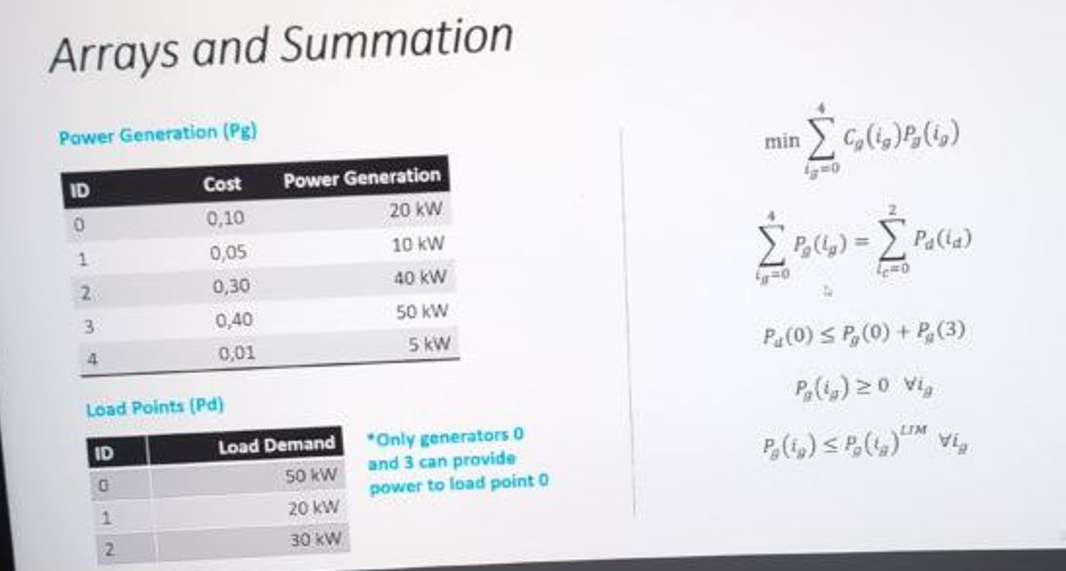

**Imports**

In [57]:
#imports
import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.opt import SolverFactory
import numpy as np
import pandas as pd

**Inputs**

In [58]:
dataGen = pd.read_excel('inputs.xlsx', sheet_name='gen')
dataLoad = pd.read_excel('inputs.xlsx', sheet_name='load')
ng = len(dataGen)


**Model**

In [59]:
model = pyo.ConcreteModel()

**Variables**

In [60]:
model.pg = pyo.Var(range(ng), bounds = (0, None))
model.pg.pprint()
pg = model.pg

pg : Size=5, Index=pg_index
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      0 :     0 :  None :  None : False :  True :  Reals
      1 :     0 :  None :  None : False :  True :  Reals
      2 :     0 :  None :  None : False :  True :  Reals
      3 :     0 :  None :  None : False :  True :  Reals
      4 :     0 :  None :  None : False :  True :  Reals


**Constraints**

In [61]:
#first constraint
pg_sum = sum(pg[i] for i in range(ng))
model.balance = pyo.Constraint(expr = pg_sum == sum(dataLoad.value))

In [62]:
#second constraint
model.cond = pyo.Constraint(expr = pg[0] + pg[3] >= dataLoad.value[0])

In [63]:
#third constraint
model.limits = pyo.ConstraintList()
for i in range(ng):
    model.limits.add(expr = pg[i] <= datagen.limit[i])

In [64]:
model.pprint()

2 Set Declarations
    limits_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {1, 2, 3, 4, 5}
    pg_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}

1 Var Declarations
    pg : Size=5, Index=pg_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :  None : False :  True :  Reals
          1 :     0 :  None :  None : False :  True :  Reals
          2 :     0 :  None :  None : False :  True :  Reals
          3 :     0 :  None :  None : False :  True :  Reals
          4 :     0 :  None :  None : False :  True :  Reals

3 Constraint Declarations
    balance : Size=1, Index=None, Active=True
        Key  : Lower : Body                                  : Upper : Active
        None : 100.0 : pg[0] + pg[1] + pg[2] + pg[3] + pg[4] : 100.0 :   True
    cond : Size=1, I

**Objective Function**

In [65]:
model.obj = pyo.Objective(expr = sum(datagen.cost[i]*pg[i] for i in range(ng)), sense = minimize)
opt = SolverFactory('cplex')
result = opt.solve(model)

In [66]:
dataGen['pg'] = [pyo.value(pg[i]) for i in range(ng)]
print(dataGen)

   id  limit  cost    pg
0   0     20  0.10  20.0
1   1     10  0.05  10.0
2   2     40  0.30  35.0
3   3     50  0.40  30.0
4   4      5  0.01   5.0
